<h3>Description</h3>
<br>

- Assume that you are at party, and that you wish to drink the best wine that is available.
- You could ask your friends for recommendations, but you suspect that they will drink any wine, regardless of its provenance.
- Fortunately you have brought pH test strips and other tools to measure various physicochemical properties of wine.
It is, after all, a party. We will use machine learning to predict the quality of the wine based on its physicochemical attributes 

- The UCI Machine learning Repository's Wine data measures eleven physicochemical attributes, including pH and alcohol content, of 1599 different red wines.
- Each wine's quality has been scored by human judges, the score range from zero to ten, zero is the worst quality and ten is the best quality 
- We will approach this problem as a regression task and regress the wine's quality on one or more physicochemical attributes.
- The response variable in this problem takes only integer values between 0 and 10; we could view these as discrete values and approach the problem as multiclass classification task.
- However, we will view the response variable as a continuous value

<br>
<h3>Explore the data</h3>
<br>


In [1]:
#import the important libraries
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
# load the dataset

wine = pd.read_csv("../datasets/Wine_Quality_Data.csv")

In [3]:
# explore the data
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [6]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


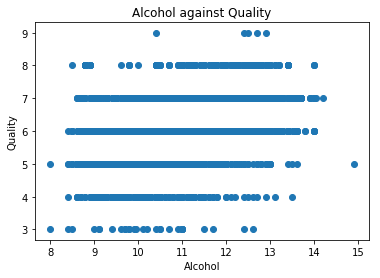

In [7]:
#visualizing the data helps to indicate the relationships exist between 
# response variable and explanatory variables
# plot a scatter graph to view the relationship between alcohol and quality

plt.scatter(wine['alcohol'],wine['quality'])
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol against Quality")
plt.show()

In [8]:
# It seems there is weak positive relationship between the alcohol content
# and quality is visible in the scatter plot, wine that have high alcohol content
# are often hight quality 

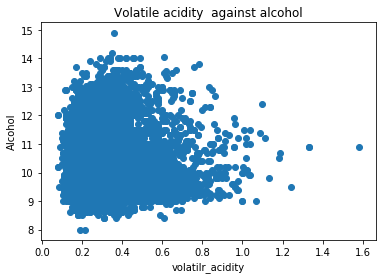

In [9]:
#The following figure reveals a negative relationship between volatile acidity and quality
plt.scatter(wine['volatile_acidity'],wine['alcohol'])
plt.xlabel("volatilr_acidity")
plt.ylabel("Alcohol")
plt.title("Volatile acidity  against alcohol")
plt.show()

In [10]:
#The plots suggest that the response variable depends on multiple explanatory variables;
#Lets model the relationship with multiple regression.
#How can we decide which explanatory variables to include in the model?
# Use correlation matrix , which confirms that the strongest positive correlation is the 
# alcohol and quality,  and quality is negative correlated with volatile acidity 
#an attriobute can cause wine to taste like vinegar 

In [11]:
# corralation matrxi
corr_matrix = wine.corr()

In [12]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [13]:
#To summarize, we must have hypothesized that good wines have high alcohol content 
#and do not taste like vinegar. This hypothesis seems sensible, though it suggests that 
# wine aficionations may have less sophisticated palates than they claim


In [14]:
#check for missing values
wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

<br>
<h3>Fitting and training the model</h3>
<br>

In [15]:
#split the dataset into train and test set

def split_train_test(data,test_size):
    shuffle_wine = np.random.permutation(len(data))
    test_range = np.int(len(data)*test_size)
    train_indeces = shuffle_wine[test_range:]
    test_indeces = shuffle_wine[:test_range]
    return data.iloc[train_indeces],data.iloc[test_indeces]

In [16]:
train_set,test_set =  split_train_test(wine,0.25)

In [17]:
train_set.shape

(4873, 13)

In [18]:
test_set.shape

(1624, 13)

In [19]:
# split a target/ a response form the data

train_set_label = train_set['quality'].copy()
#for now just drop the column color
train_set=train_set.drop(['quality','color'],axis=1)

In [20]:
train_set.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3265,7.8,0.445,0.56,1.0,0.040,8.0,84.0,0.99380,3.25,0.43,10.8
5028,7.1,0.180,0.39,14.5,0.051,48.0,156.0,0.99947,3.35,0.78,9.1
1119,5.6,0.660,0.00,2.5,0.066,7.0,15.0,0.99256,3.52,0.58,12.9
4289,6.9,0.300,0.25,3.3,0.041,26.0,124.0,0.99428,3.18,0.50,9.3
3537,7.2,0.160,0.35,1.2,0.031,27.0,84.0,0.99280,3.33,0.34,9.9


In [21]:
#create a model 
regressor = LinearRegression()
#fit the model
regressor.fit(train_set,train_set_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# make prediction
# split a target/ a response form the data
test_set_label = test_set['quality'].copy()
#for now just drop the column color
test_set=test_set.drop(['quality','color'],axis=1)
predictions = regressor.predict(test_set)

In [23]:
print("True values : ",np.array([test_set_label]))
print("Predicted values : ",predictions)

True values :  [[5 6 6 ... 6 6 5]]
Predicted values :  [5.73391553 6.15028102 5.94255629 ... 5.7316434  5.57390343 5.43519374]


In [24]:
#The model accuracy
print("Model accuracy : ",regressor.score(test_set,test_set_label))

Model accuracy :  0.29544227573338433


In [25]:
# The r-square score of 0,26 that is 26 percent of the variance in the test set is 
# explained by model 
# The performance might change if a different 75 percent of the data is partitioned to the
#training set. 
# We can use cross validation to produce a better estimate of the estimator's performance 
#Cross validation rounds training and test different partitions of the data to reduce 
#variability

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor,train_set,train_set_label,cv=5)

In [27]:
print("Mean score (scores.mean())", scores)

Mean score (scores.mean()) [0.24940937 0.31126956 0.2551264  0.28151386 0.30333974]


In [28]:
#cross_val_scores helper function allows us to easily perform cross-validation
#using the provided data and estimator, We spaecified a five fold cross validation using
# the cv keyword argument, that is each instance will be randomly assigned to one
# of the five partitions.
#each partition will be used to train and partion the model
#The final it returns the model performance at each pass
# it can be seen the r-square ranges from 0.28-0.31, this can mean that
# the score of 0,29 can be the better estimate of the estimators predictive power than the
# r-square produced from single train/test split

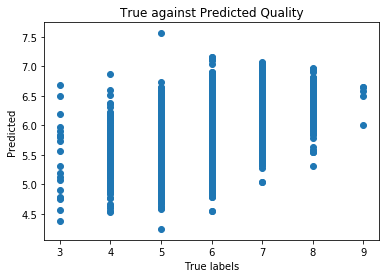

In [29]:

# plot a scatter graph to view the relationship between true  and predicted quality

plt.scatter(train_set_label,regressor.predict(train_set))
plt.xlabel("True labels")
plt.ylabel("Predicted")
plt.title("True against Predicted Quality")
plt.show()

In [30]:
#As expected, few predictions excatly match the true values of the response variable.
#The model is also better at predicting the qualities of average wines,since most of the
# training data is for average wine